In [2]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
base_path = 'C://Users/Kanika/Downloads/'
images_boxable_fname = 'CSV/train-images-boxable-with-rotation.csv'
annotations_bbox_fname = 'CSV/train-annotations-bbox.csv'
class_descriptions_fname = 'CSV/class-descriptions-boxable.csv'

In [21]:
images_boxable = pd.read_csv('CSV/train-images-boxable-with-rotation.csv')
images_boxable.head()

,ImageID,Subset,OriginalURL,OriginalLandingURL,License,AuthorProfileURL,Author,Title,OriginalSize,OriginalMD5,Thumbnail300KURL,Rotation
0,4fa8054781a4c382,train,https://farm3.staticflickr.com/5310/5898076654...,https://www.flickr.com/photos/michael-beat/589...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/michael-beat/,Michael Beat,...die FNF-Kerze,4405052,KFukvivpCM5QXl5SqKe41g==,https://c1.staticflickr.com/6/5310/5898076654_...,0.0
1,b37f763ae67d0888,train,https://c1.staticflickr.com/1/67/197493648_628...,https://www.flickr.com/photos/drstarbuck/19749...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/drstarbuck/,Karen,Three boys on a hill,494555,9IzEn38GRNsVpATuv7gzEA==,https://c3.staticflickr.com/1/67/197493648_628...,0.0
2,7e8584b0f487cb9e,train,https://c7.staticflickr.com/8/7056/7143870979_...,https://www.flickr.com/photos/circasassy/71438...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/circasassy/,CircaSassy,A Christmas carol and The cricket on the heart...,2371584,3hQwu0iSzY1VIoXiwp0/Mg==,https://c7.staticflickr.com/8/7056/7143870979_...,0.0
3,86638230febe21c4,train,https://farm5.staticflickr.com/5128/5301868579...,https://www.flickr.com/photos/ajcreencia/53018...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/ajcreencia/,Alex,Abbey and Kenny,949267,onB+rCZnGQg5PRX7xOs18Q==,https://c4.staticflickr.com/6/5128/5301868579_...,NaN
4,249086e72671397d,train,https://c6.staticflickr.com/4/3930/15342460029...,https://www.flickr.com/photos/codnewsroom/1534...,https://creativecommons.org/licenses/by/2.0/,https://www.flickr.com/people/codnewsroom/,COD Newsroom,Suburban Law Enforcement Academy 20th Annivers...,6541758,MjpaAVbMAWbCusSaxI1D7w==,https://c1.staticflickr.com/4/3930/15342460029...,0.0


In [22]:
annotations_bbox = pd.read_csv('CSV/train-annotations-bbox.csv')
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [23]:
class_descriptions = pd.read_csv('CSV/class-descriptions-boxable.csv')
class_descriptions.head()

,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [27]:
print('length of the images_boxable: %d' %(len(images_boxable)) )
print('First image in images_boxable')
img_name = images_boxable['ImageID'][0]
img_url = images_boxable['Thumbnail300KURL'][0]
print('\t image_name: %s' % (img_name))
print('\t img_url: %s' % (img_url))
print('')
print('length of the annotations_bbox: %d' %(len(annotations_bbox)))
print('The number of bounding boxes are larger than number of images.')
print('')
print('length of the class_descriptions: %d' % (len(class_descriptions)-1))
img = io.imread(img_url)

length of the images_boxable: 1743042
First image in images_boxable
	 image_name: 4fa8054781a4c382
	 img_url: https://c1.staticflickr.com/6/5310/5898076654_00643a940c_z.jpg

length of the annotations_bbox: 14610229
The number of bounding boxes are larger than number of images.

length of the class_descriptions: 600


(480, 640, 3)


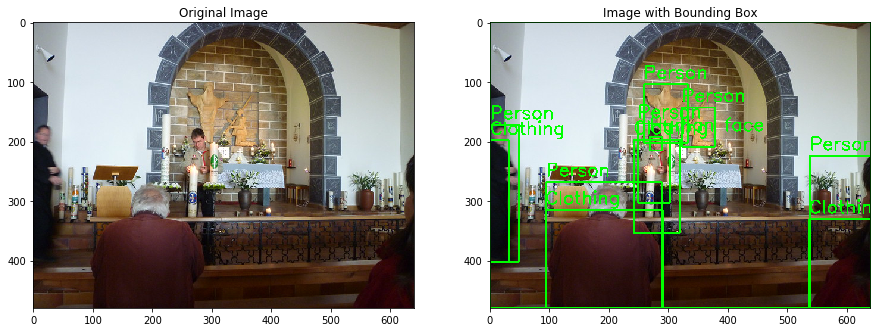

In [28]:
height, width, _ = img.shape
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_id = img_name[:16]
bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
img_bbox = img.copy()
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    class_series = class_descriptions[class_descriptions['name']==label_name]
    class_name = class_series['class'].values[0]
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)
plt.show()

In [29]:
# Find the label_name for 'Person', 'Mobile Phone' and 'Car' classes
classes = ['Apple','Grape','Common fig','Pear','Strawberry','Lemon','Banana','Orange','Peach','Mango','Pineapple',
           'Grapefruit','Pomegranate','Watermelon','Cantaloupe','Egg','Bread','Mushroom','Pasta','Squid','Shellfish','Oyster',
           'Lobster','Shrimp','Crab','Cooking spray','Cucumber','Radish','Artichoke','Potato','Tomato','Asparagus',
           'Pumpkin','Zucchini','Cabbage','Carrot','Broccoli','Bell pepper','Winter melon', 'Cheese','Milk']

In [30]:
# creating a list of modified dataframes with two columns
class_pd = {i: pd.DataFrame(columns = ('name', 'class')) for i in classes}
label_name = {i: pd.DataFrame() for i in classes}
class_bbox = {i: pd.DataFrame() for i in classes}
class_img_id = {i: pd.DataFrame() for i in classes} 
class_img_id_img = {i: pd.DataFrame() for i in classes} 
#class_pd = {i: pd.DataFrame() for i in range(len(classes))}
#label_name = {i: pd.DataFrame() for i in range(len(classes))}

In [31]:
for x in classes:
    class_pd[str(x)] = class_descriptions[class_descriptions['class']==x]
    label_name[str(x)] = class_pd[str(x)]['name'].values[0]
    class_bbox[str(x)] = annotations_bbox[annotations_bbox['LabelName']==label_name[str(x)]]
    class_img_id[str(x)] = class_bbox[str(x)]['ImageID']
    class_img_id_img[str(x)] = np.unique(class_img_id[str(x)])

In [120]:
print('There are %d grapes in the dataset' %(len(class_bbox['Grape'])))
print('There are %d images which contain grapes' % (len(class_img_id_img['Grape'])))

There are 2787 grapes in the dataset
There are 767 images which contain grapes


In [121]:
# Shuffle the ids and pick the first 250 ids
copy_class_img_id = {i: pd.DataFrame() for i in classes} 
sub_img_id = {i: pd.DataFrame() for i in classes}

for x in classes:
    copy_class_img_id[str(x)] = class_img_id_img[str(x)].copy()
    random.seed(1)
    random.shuffle(copy_class_img_id[str(x)])
    n = min(len(class_img_id_img[str(x)]),250)
    sub_img_id[str(x)] = copy_class_img_id[str(x)][:n]

#subperson_img_id = copy_person_id[:n]
#subphone_img_id = copy_phone_id[:n]
#subcar_img_id = copy_car_id[:n]

In [122]:
print(sub_img_id['Grape'][10])

1b6ee7ce44ce86c0


In [123]:
subapple_img_url = [images_boxable[images_boxable['ImageID']==name] for name in sub_img_id['Apple'][1:10]]

In [ ]:
# This might takes a while to search all these urls
sub_img_url = {i: pd.DataFrame() for i in classes}

for x in classes:
    sub_img_url[str(x)] = [images_boxable[images_boxable['ImageID']==name] for name in sub_img_id[str(x)]]

#subperson_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg'] for name in subperson_img_id]
#subphone_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg'] for name in subphone_img_id]
#subcar_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg'] for name in subcar_img_id]

In [ ]:
sub_pd = {i: pd.DataFrame() for i in classes}
for x in classes:
    for i in range(len(sub_img_url[str(x)])):
        #sub_pd[str(x)]
        sub_pd[str(x)] = sub_pd[str(x)].append(sub_img_url[str(x)][i], ignore_index = True)
        sub_pd[str(x)].to_csv(os.path.join('CSV/', str(x)+'_img_url.csv'))

In [67]:
sub_pd = {i: pd.DataFrame() for i in classes}

for x in classes:
    sub_pd[str(x)] = pd.read_csv(os.path.join('CSV/', str(x)+'_img_url.csv'))

In [7]:
urls= []
sub_img_url_new = {i: pd.DataFrame() for i in classes}

for x in classes:
    #print(x)
    sub_img_url_new[str(x)] = [sub_pd[str(x)]['OriginalURL']]
    urls.append(sub_img_url_new[str(x)])
    
#subperson_img_url = [url['image_url'].values[0] for url in subperson_img_url]
#subphone_img_url = [url['image_url'].values[0] for url in subphone_img_url]
#subcar_img_url = [url['image_url'].values[0] for url in subcar_img_url]
#urls = [subperson_img_url, subphone_img_url, subcar_img_url]

In [8]:
saved_dirs = []
for x in classes:
    saved_dirs.append(os.path.join(base_path,'CV Project/images/', str(x)+'/'))

In [9]:
print(len(urls[0][0]))
print(urls[0][0][0])

250
https://c1.staticflickr.com/9/8213/8277291706_291fe3a453_o.jpg


In [10]:
saved_dirs[13]

'C://Users/Kanika/Downloads/CV Project/images/Watermelon/'

#### Downloading Images

In [11]:
# Handling warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Download images
from requests.exceptions import HTTPError

for i in range(13,len(classes)):
    # Create the directory
    os.mkdir(str(saved_dirs[i]))
    saved_dir = saved_dirs[i]
    for url in urls[i][0]:
        try:
            # print(url)
            img = io.imread(url)
            saved_path = os.path.join(saved_dir, url[-20:])
            io.imsave(saved_path, img)
        except:
            pass

#### Preparing Dataset

* 80/20 train and validation split
* Bounding boxes and labels for frcnn model format

In [18]:
import math

# Save images to train and test directory
train_path = os.path.join(base_path, 'CV Project/images/train')
#os.mkdir(train_path)
test_path = os.path.join(base_path, 'CV Project/images/test')
#os.mkdir(test_path)

for i in range(len(classes)):
    
    all_imgs = os.listdir(os.path.join(base_path, 'CV Project/images/', classes[i]+'/'))
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.seed(1)
    random.shuffle(all_imgs)
    x = math.floor(0.8*len(urls[i][0]))
    train_imgs = all_imgs[:x]
    test_imgs = all_imgs[x:]
    
    # Copy each classes' images to train directory
    for j in range(len(train_imgs)):
        original_path = os.path.join(os.path.join(base_path, 'CV Project/images/', classes[i]+'/'), train_imgs[j])
        new_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_path, new_path)
    
    # Copy each classes' images to test directory
    for j in range(len(test_imgs)):
        original_path = os.path.join(os.path.join(base_path, 'CV Project/images/', classes[i]+'/'), test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)

In [24]:
print('number of training images: ', len(os.listdir(train_path))) # subtract one because there is one hidden file named '.DS_Store'
print('number of test images: ', len(os.listdir(test_path)))

number of training images:  6859
number of test images:  1276


#### Train and Test Annotation csv files

In [34]:
label_names = []
for x in classes:
    label_names.append(x)

In [74]:
i = 0
for x in classes:
    y = pd.DataFrame(urls[i][0])
    y['ImageIDnew'] = y['OriginalURL'].str[-20:-4]
    #url_column = pd.Dataframe(urls[i][0])
    #print(x)
    sub_pd[str(x)]['ImageIDNew'] = y['ImageIDnew']
    i+=1

In [92]:
ID_to_Name = pd.DataFrame(columns = ('ImageIDNew', 'ImageID'))
ID_to_Name = pd.concat([pd.DataFrame(sub_pd[str(x)][['ImageIDNew','ImageID']]) for x in classes], ignore_index=True)

In [107]:
ID_New = list(ID_to_Name['ImageID'])

In [112]:
ID_Name = list(ID_to_Name['ImageIDNew'])

In [131]:
main_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

for i in range(len(ID_New)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(main_df)) + '\r')
    sys.stdout.flush()
    img_id = ID_New[i]
    img_name = ID_Name[i]
    #img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    #print(tmp_df)
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            #print(labelName + '\n')
            #print(label_names[i]+ '\n')
            #print('\n')
            if labelName == label_name[label_names[i]]:
                #print(1)
                main_df = main_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

In [132]:
main_df.to_csv(os.path.join('CSV/', 'main_annotations.csv'))

In [148]:
train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name[:-4] for name in train_imgs if not name.startswith('.')]

test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name[:-4] for name in test_imgs if not name.startswith('.')]

In [166]:
train_imgs = pd.DataFrame(train_imgs)
test_imgs = pd.DataFrame(test_imgs)

In [169]:
len(train_imgs)

6859

In [168]:
train_imgs.columns = ['FileName']
test_imgs.columns = ['FileName']

In [152]:
train_df = pd.merge(main_df, train_imgs, on='FileName', how='inner')

In [153]:
test_df = pd.merge(main_df, train_imgs, on='FileName', how='inner')

#### Csv to .txt format for input

In [181]:
# print(train_df.head())
#train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# For training
f= open(base_path +'CSV/'+"/annotation.txt","w+")
for idx, row in train_df.iterrows():
#     sys.stdout.write(str(idx) + '\r')
#     sys.stdout.flush()
    try:
        img = cv2.imread((base_path + 'CV Project/images/train/' + row['FileName']+'.jpg'))
        height, width = img.shape[:2]
        fileName = os.path.join(base_path, 'CV Project/images/train/' + row['FileName']+'.jpg')
        x1 = int(row['XMin'] * width)
        x2 = int(row['XMax'] * width)
        y1 = int(row['YMin'] * height)
        y2 = int(row['YMax'] * height)

        #google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/train'
        #fileName = os.path.join(google_colab_file_path, row['FileName'])
        className = row['ClassName']
        f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
    except:
        pass
f.close()

In [182]:
# print(train_df.head())
#train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# For training
f= open(base_path +'CSV/'+"/test_annotation.txt","w+")
for idx, row in train_df.iterrows():
#     sys.stdout.write(str(idx) + '\r')
#     sys.stdout.flush()
    try:
        img = cv2.imread((base_path + 'CV Project/images/test/' + row['FileName']+'.jpg'))
        height, width = img.shape[:2]
        fileName = os.path.join(base_path, 'CV Project/images/test/' + row['FileName']+'.jpg')
        x1 = int(row['XMin'] * width)
        x2 = int(row['XMax'] * width)
        y1 = int(row['YMin'] * height)
        y2 = int(row['YMax'] * height)

        #google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/train'
        #fileName = os.path.join(google_colab_file_path, row['FileName'])
        className = row['ClassName']
        f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
    except:
        pass
f.close()

In [180]:
train_df.tail()

,FileName,XMin,XMax,YMin,YMax,ClassName
24811,293_ae217012f1_o,0.246892,0.852575,0.389169,0.994962,Milk
24812,812_057058e05c_o,0.112500,0.663750,0.278125,0.605625,Milk
24813,812_057058e05c_o,0.735625,0.999375,0.245625,0.805625,Milk
24814,732_96fbbe9e64_o,0.659375,0.918125,0.253556,0.702929,Milk
24815,275_5c01c96351_o,0.043125,0.951875,0.046992,0.961779,Milk
